In [15]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import copy

In [2]:
dogproblem = BayesNet()
dogproblem.load_from_bifxml('testing/dog_problem.BIFXML')

In [ ]:
dogproblem.draw_structure()

In [6]:
dogproblem.get_all_variables()

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']

In [7]:
dogproblem.get_all_cpts()

{'light-on':    family-out  light-on     p
 0       False     False  0.60
 1       False      True  0.40
 2        True     False  0.05
 3        True      True  0.95, 'bowel-problem':    bowel-problem     p
 0          False  0.01
 1           True  0.99, 'dog-out':    family-out  bowel-problem  dog-out     p
 0       False          False    False  0.99
 1       False          False     True  0.01
 2       False           True    False  0.97
 3       False           True     True  0.03
 4        True          False    False  0.90
 5        True          False     True  0.10
 6        True           True    False  0.30
 7        True           True     True  0.70, 'hear-bark':    dog-out  hear-bark     p
 0    False      False  0.70
 1    False       True  0.30
 2     True      False  0.01
 3     True       True  0.99, 'family-out':    family-out     p
 0       False  0.15
 1        True  0.85}

In [9]:
dogproblem.get_children('light-on')

[]

In [3]:
dogproblem.get_all_edges()

[('bowel-problem', 'dog-out'),
 ('dog-out', 'hear-bark'),
 ('family-out', 'light-on'),
 ('family-out', 'dog-out')]

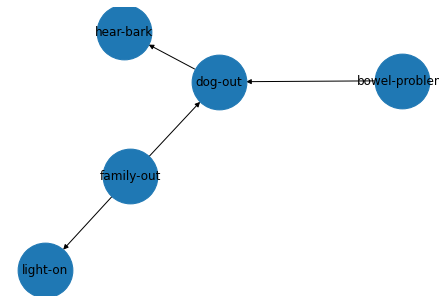

light-on
[]
bowel-problem
['dog-out']
dog-out
['hear-bark']
hear-bark
[]
family-out
['light-on', 'dog-out']
family-out
light-on
[]
bowel-problem
['dog-out']
dog-out
[]
hear-bark
[1]
family-out
[]
family-out
light-on
[]
bowel-problem
[]
dog-out
[1]
hear-bark
[1]
family-out
[]
family-out


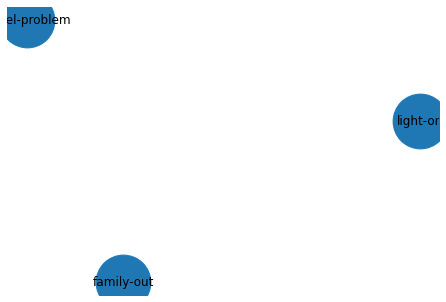

0

In [21]:
x = ['light-on']
y = ['bowel-problem']
z = ['family-out']
xyz = x + y + z

bn = copy.deepcopy(dogproblem)
bn.draw_structure()
continueiter = True
while continueiter == True:
    continueiter = False
    for variable in dogproblem.get_all_variables():
        print(variable)
        children = [1]
        try:
            children = bn.get_children(variable)
        except:
            pass
        print(children)
        if len(children) == 0:
            if variable not in xyz:
                try:
                    bn.del_var(variable)
                except:
                    pass
                for edge in bn.get_all_edges():
                    if variable in edge: 
                        bn.del_edge(edge)
                continueiter = True
    for variable in z:
        print(variable)
        for edge in bn.get_all_edges():
            if edge[0] == variable: 
                bn.del_edge(edge)

bn.draw_structure()

connected = []
for X in x:
    for Y in y:
        connected.append(nx.has_path(bn.get_interaction_graph(),X,Y))
        
sum(connected)